#Machine Learning TABA Report Magdalena Sliwa

#Question 1 Classification

##Loading Data

In [1]:
#importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets/data.csv',encoding='unicode_escape')

In [ ]:
#Dataset info
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Data pre-processing

### Missing values

In [ ]:
#Counting missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Text(0.5, 1.0, 'Missing values heatmap')

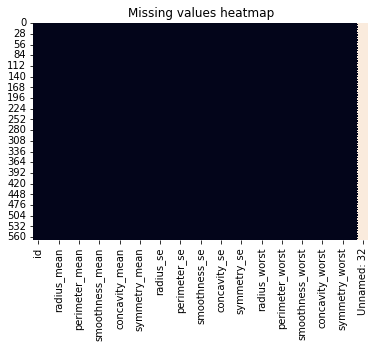

In [ ]:
#Displaying missing values heatmap
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

###Data cleaning

In [ ]:
#Creating array of columns' names beside first variable
feature_cols = df.columns[1:]
print(feature_cols)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [ ]:
#Removing two columns
df.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [ ]:
#Counting of the number of malignant and benign cells as'M' and 'B'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


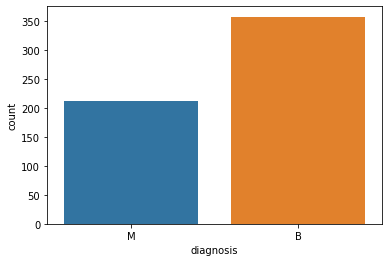

In [ ]:
#Visualising patiens with malignant or benign cancer cells as target data
sns.countplot(df['diagnosis'],label="Count")

###Feature selection

In [ ]:
subset = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean']]

subset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0


In [ ]:
#Encoding categorical data values (
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,0]= labelencoder_Y.fit_transform(df.iloc[:,0].values)
print(labelencoder_Y.fit_transform(df.iloc[:,0].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###Visualisation

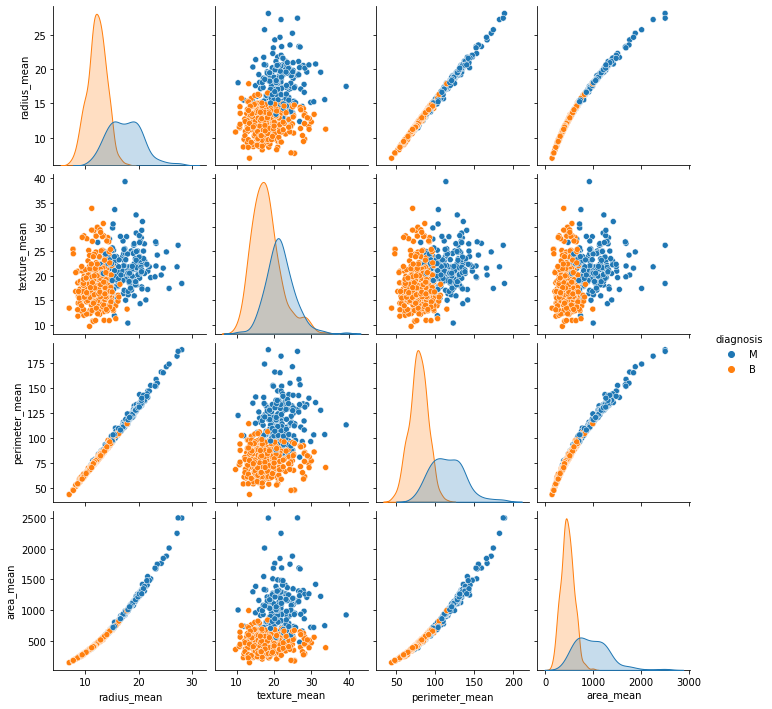

In [ ]:
#Creating a pair plot. A “pairs plot” is also known as a scatter plot,
# in which one variable in the same data row is matched with another variable’s value
sns.pairplot(subset.iloc[:,0:5], hue="diagnosis")

###Correlation

In [ ]:
#Obtaining the correlation of the columns of subset
subset.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.000000,0.323782,0.997855,0.987357
texture_mean,0.323782,1.000000,0.329533,0.321086
perimeter_mean,0.997855,0.329533,1.000000,0.986507
area_mean,0.987357,0.321086,0.986507,1.000000


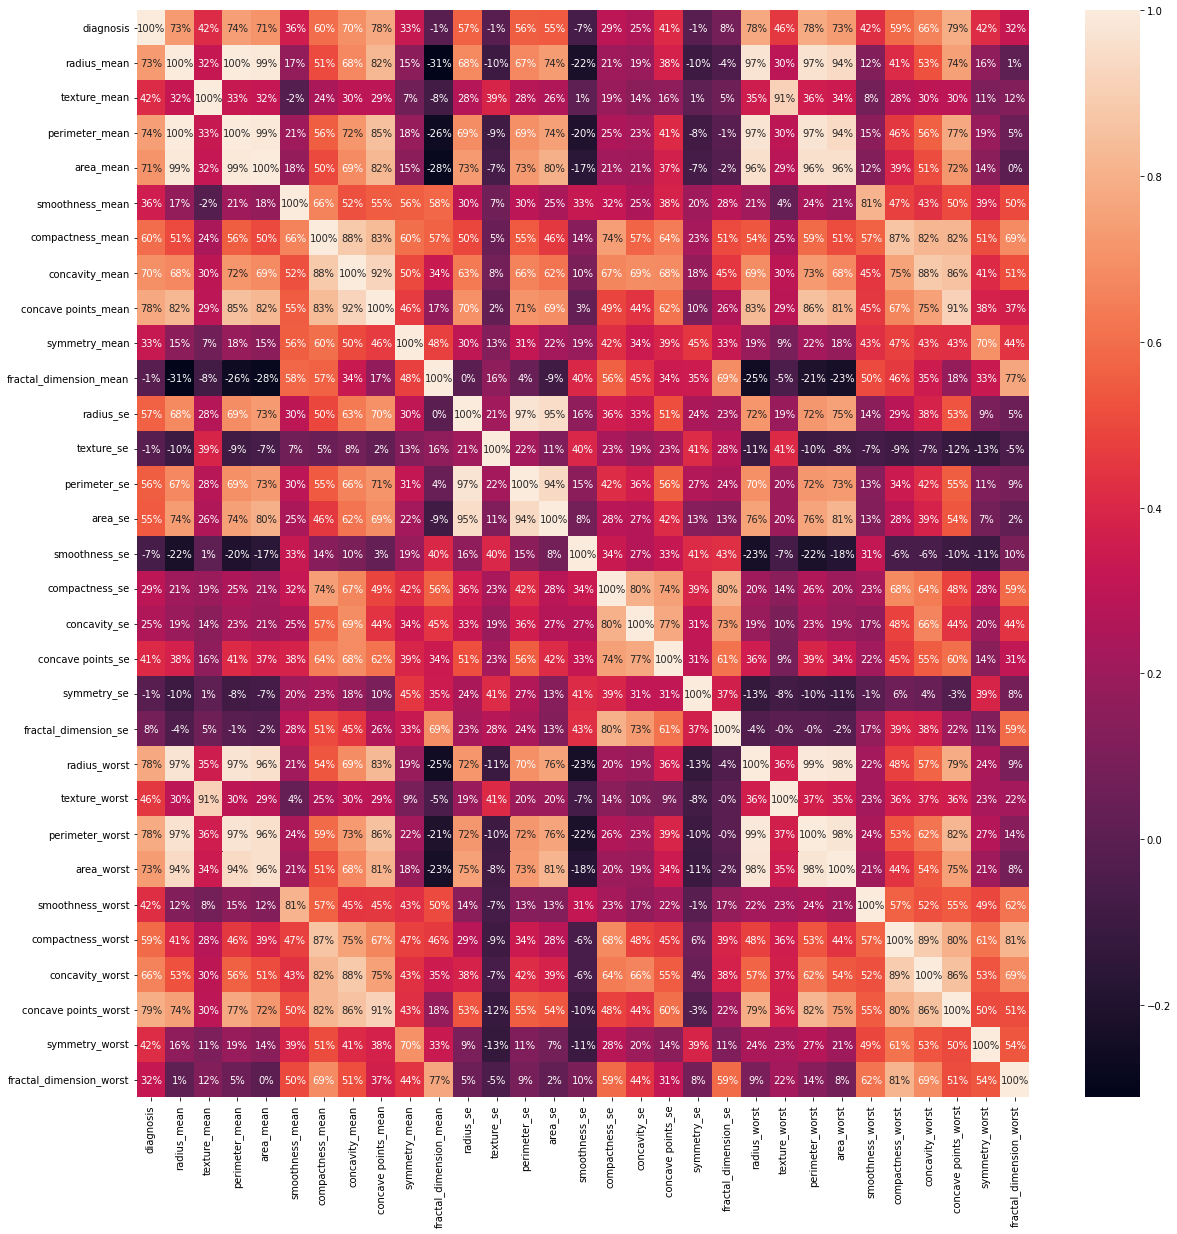

In [ ]:
#Visualising the correlation of a dataset by a heat map
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
# Setting up data for the model by first splitting the data set into a feature dataset
X = df.iloc[:, 1:32].values #features
Y = df.iloc[:, 0].values #target variable


Feature Extraction

In [ ]:
# Splitting the data again, but this time into 75% training and 25% testing data sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Modelling

###Models training

In [ ]:
# Using function to hold many different models 
#https://www.youtube.com/watch?v=NSSOyhJBmWY

def models(X_train,Y_train):
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #printing model accuracy on the training data.
  print('[0]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return  knn, tree, forest


In [ ]:
#Presenting models accuracy metric results
model = models(X_train,Y_train)

[0]K Nearest Neighbor Training Accuracy: 0.9741784037558685
[1]Decision Tree Classifier Training Accuracy: 0.9765258215962441
[2]Random Forest Classifier Training Accuracy: 0.9976525821596244


In [ ]:
#Finding number of observation
print("No of Observations: {}\n".format(Y_train.shape[0]))

No of Observations: 426



In [ ]:
#Finding the square root
np.sqrt(Y_train.shape[0])

20.639767440550294

##Models evaluation

In [ ]:
#The classification metrics 
for i in range(len(model)):
  print('model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line
  print()# Print a new line

model  0
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


model  1
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


model  2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighte

####kNN evaluation

In [ ]:
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors = 5)

In [ ]:
#Training model
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
#Printing the actual values
print(Y_test)
Y_test.dtype

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


dtype('int64')

In [ ]:
#Printing predicted values
y_pred = knn.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]


In [ ]:
import array
x = array.array('i',Y_test)
print(x)

array('i', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])


######Confusion Matrix

In [ ]:
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, y_pred)
print(cf_matrix)

[[88  2]
 [ 6 47]]


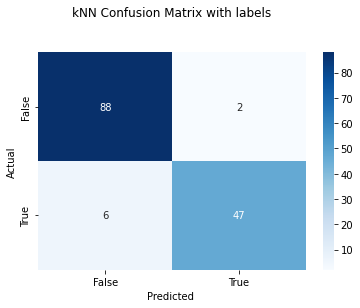

In [ ]:
#Creating heatmap to plot the confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('kNN Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

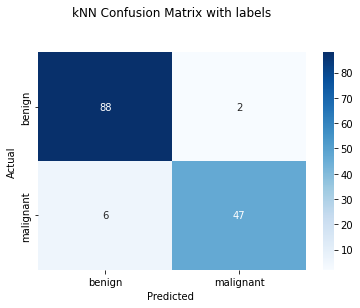

In [ ]:
#Creating heatmap to plot the confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('kNN Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# compute accuracy of the model
knn.score(X_test, Y_test)

0.9440559440559441

In [ ]:
cf_matrix2 = confusion_matrix(Y_test, y_pred)
print(cf_matrix2)

[[88  2]
 [ 6 47]]


####Decision Tree Classifier evaluation

In [ ]:
# Createing Decision Tree classifer object
#https://www.datacamp.com/tutorial/decision-tree-classification-python

clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_predict = clf.predict(X_test)

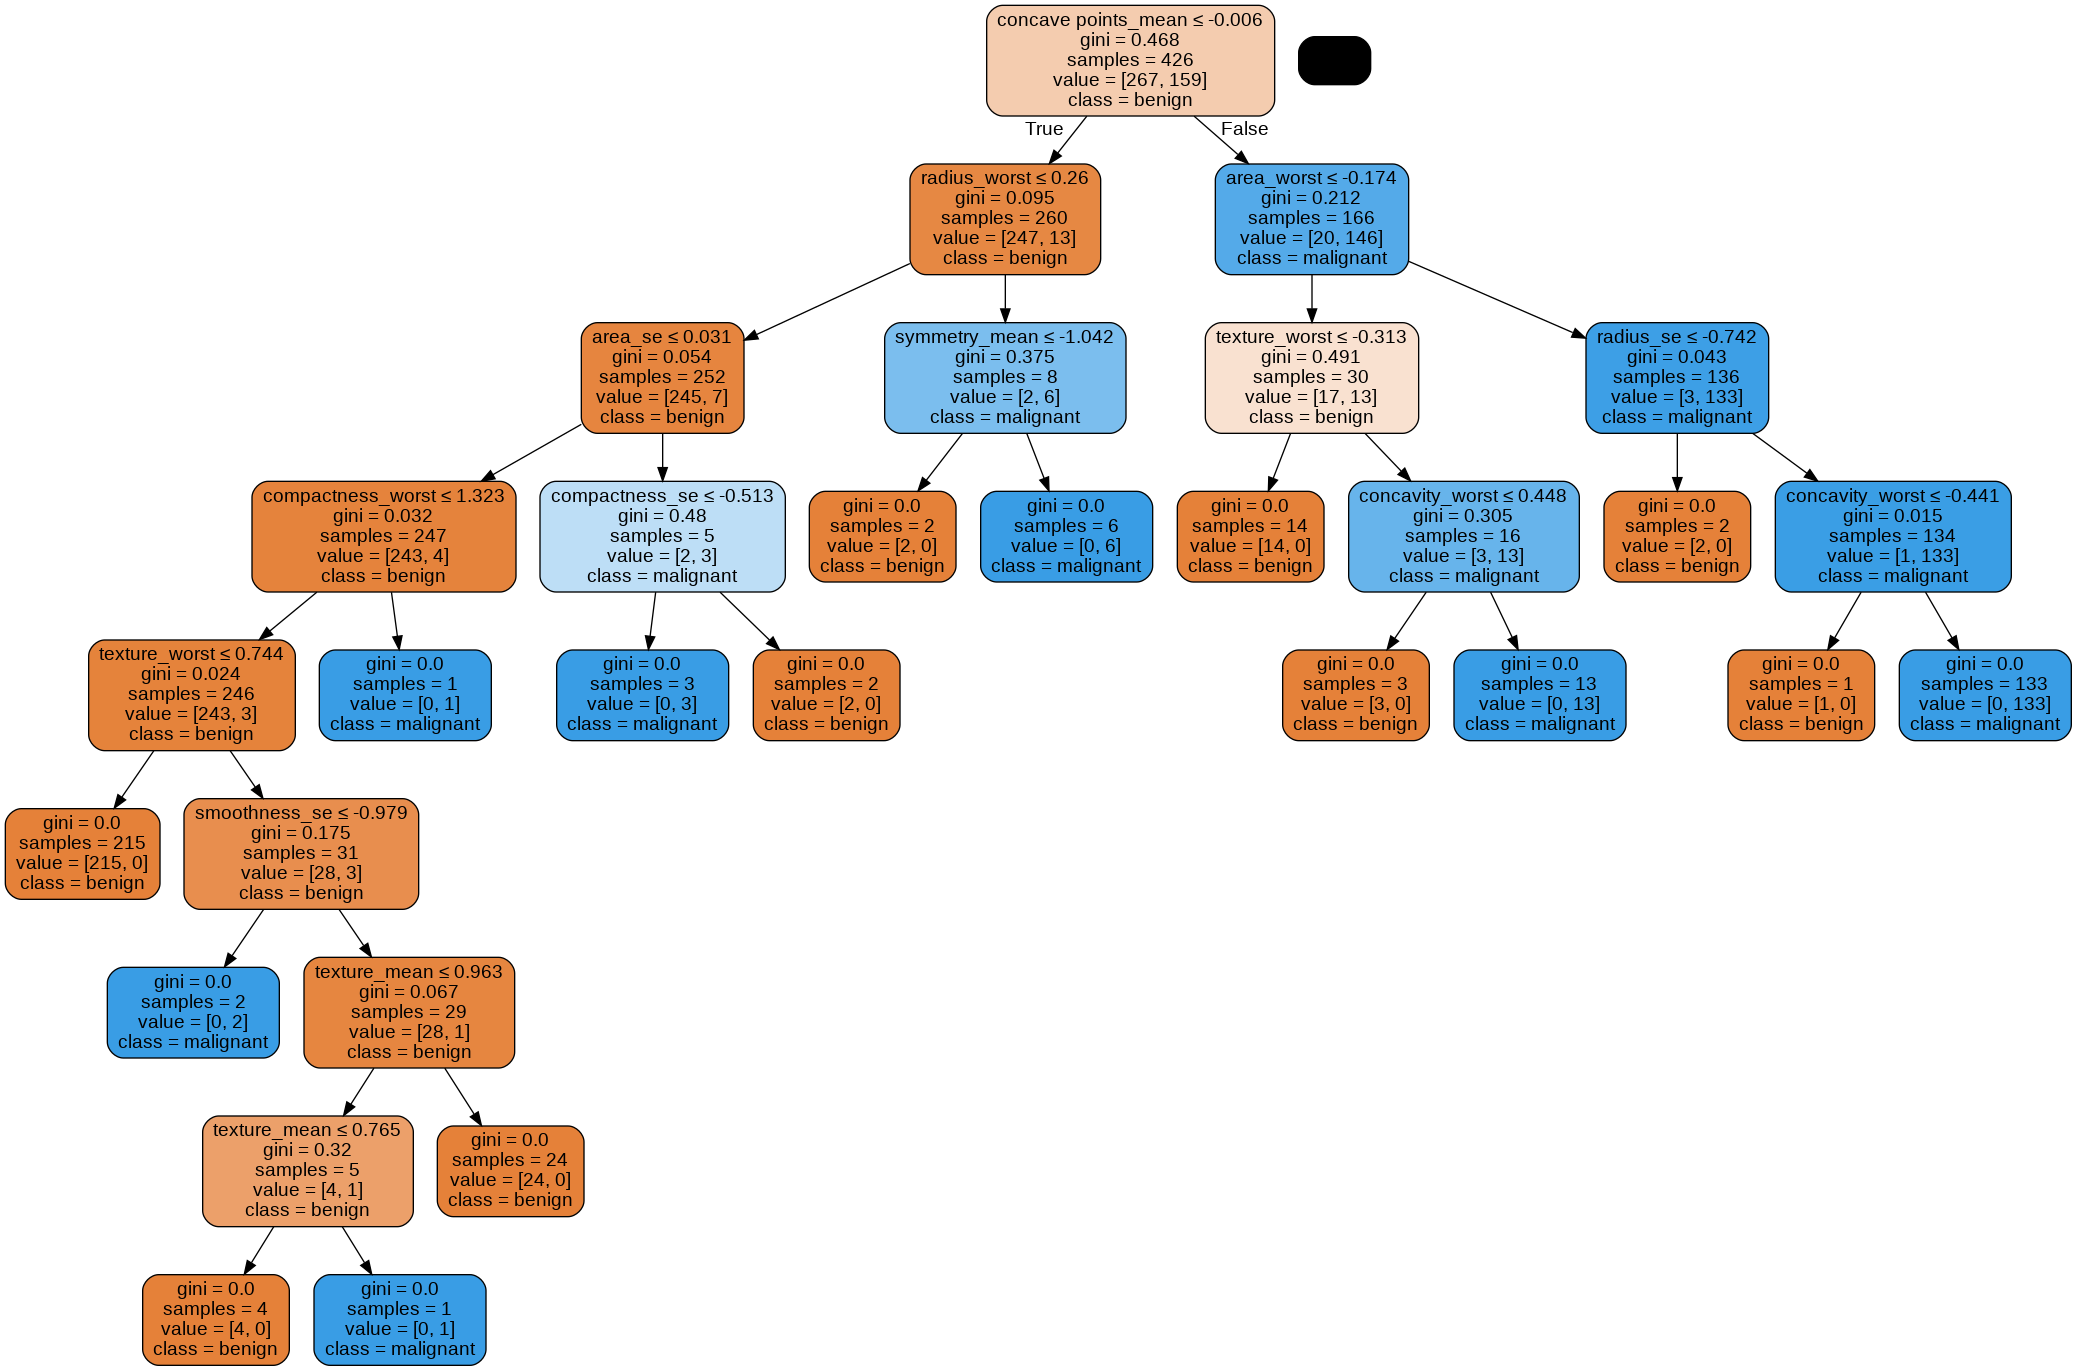

In [ ]:
#Visualising Decision Tree
#https://www.datacamp.com/tutorial/decision-tree-classification-python
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['benign','malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

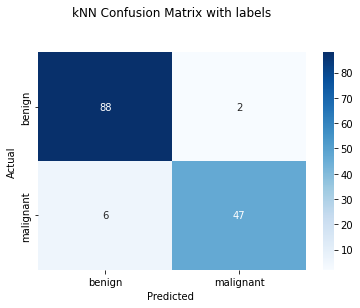

In [ ]:
#Creating heatmap to plot the confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('kNN Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# compute accuracy of the model
knn.score(X_test,Y_test)

0.9440559440559441

In [ ]:
cf_matrix2 = confusion_matrix(Y_test, y_pred)
print(cf_matrix2)

[[88  2]
 [ 6 47]]


#Question 2. Clustering

##Loading data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from functools import reduce

%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

#Instaling Kmodes library
!pip install KModes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Datasets/bankmarketing.csv')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Examining the dataset**

In [ ]:
#Establishing shape of dataset
print(bank_df.shape)

(41188, 21)


In [ ]:
#Checking datatypes
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Descriptive statistics
print(bank_df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

##Data pre-processing

**Subsetting a dataset**

In [ ]:
#Subsetting a dataset
customer = bank_df[['age','job', 'marital', 'education']]
customer.head()

,age,job,marital,education
0,56,housemaid,married,basic.4y
1,57,services,married,high.school
2,37,services,married,high.school
3,40,admin.,married,basic.6y
4,56,services,married,high.school


In [ ]:
#Checking subsetted dataset shape
customer.shape

(41188, 4)

**Converting age into new categorical variable**

In [ ]:
#Converting age into new categorical variable
customer['age_bin'] = pd.cut(customer['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
customer.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,age_bin
0,56,housemaid,married,basic.4y,50-60
1,57,services,married,high.school,50-60
2,37,services,married,high.school,30-40
3,40,admin.,married,basic.6y,30-40
4,56,services,married,high.school,50-60


In [ ]:
#Checking subsetted dataset shape
customer.shape

(41188, 5)

**Missing values**

In [ ]:
#Identifying missing values
customer.isnull().sum()

age          0
job          0
marital      0
education    0
age_bin      0
dtype: int64

In [ ]:
#Countign number of distinct elements
customer.nunique()

age          78
job          12
marital       4
education     8
age_bin       9
dtype: int64

**Converting categorical features into numerical features**

In [ ]:
#Converting categorical features into numerical features
converter = preprocessing.LabelEncoder()
customer = customer.apply(converter.fit_transform)
customer.head()

,age,job,marital,education,age_bin
0,39,3,1,0,4
1,40,7,1,3,4
2,20,7,1,3,2
3,23,0,1,1,2
4,39,7,1,3,4


**Dividing market_df into label and feature sets**

In [ ]:
#Data splitting
X = customer.drop('age_bin', axis=1) # Features
Y = customer['age_bin'] # Labels
print(X.shape)
print(Y.shape)

(41188, 4)
(41188,)


###### **Normalizing numerical features so that each feature has mean 0 and variance 1**

In [ ]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

X_scaled

array([[ 1.5334083 , -0.20157925, -0.2837415 , -1.75392459],
       [ 1.62938803,  0.91122681, -0.2837415 , -0.34973033],
       [-0.29020655,  0.91122681, -0.2837415 , -0.34973033],
       ...,
       [ 1.5334083 ,  0.35482378, -0.2837415 ,  1.05446393],
       [ 0.38165155,  1.46762984, -0.2837415 ,  0.58639918],
       [ 3.26104342,  0.35482378, -0.2837415 ,  0.58639918]])

### Dimentionality Reduction using PCA



In [ ]:
#Implementing PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.36418117 0.27202165]
Total variance explained by the n_components:  0.636202818548712


##Visualisation

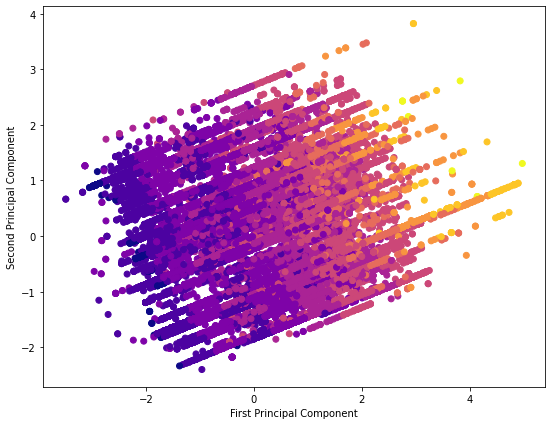

In [ ]:
#Visualize PCA on customer
plt.figure(figsize = (9,7))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

###Elbow Plot Method



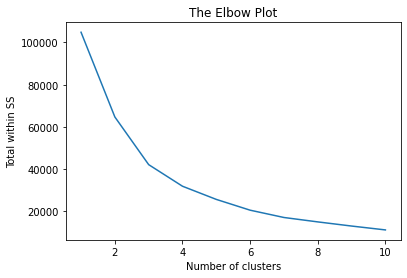

In [ ]:
#Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Total within SS')
plt.show()

###Visualising clusters

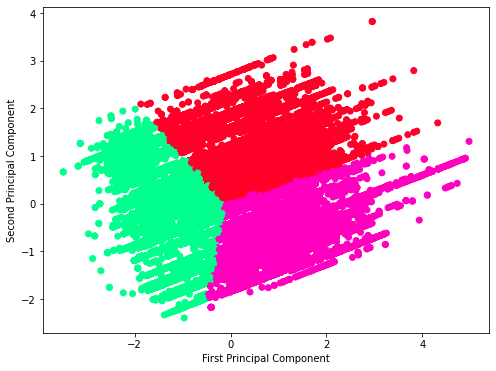

In [ ]:
# Implementing K-Means CLustering on customer and visualizing clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_pca)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='gist_rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()